In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
# 데이터 로드
data = pd.read_csv("F:/kdt jupyter/Project/Data/continuous_factory_process.csv")

# copy 생성
df = data.copy()
df.head(3)

# time_stamp 데이터 타입 string -> timestamp
df["time_stamp"] = pd.to_datetime(df["time_stamp"])

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


##### 9655 ~ 9680 이상치 인덱스 제거

In [3]:
df = pd.concat([df[:9655], df[9681:]])

## RawMaterialFeeder

#### Machine1.RawMaterialFeederParameter.U.Actual

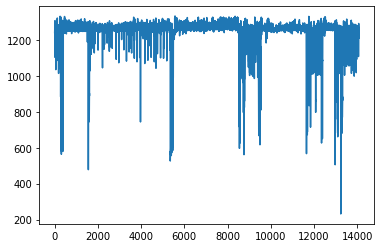

In [4]:
plt.plot(df["Machine1.RawMaterialFeederParameter.U.Actual"])

In [5]:
df = df.loc[df["Machine1.RawMaterialFeederParameter.U.Actual"] > 975]

In [6]:
df.shape

(13690, 116)

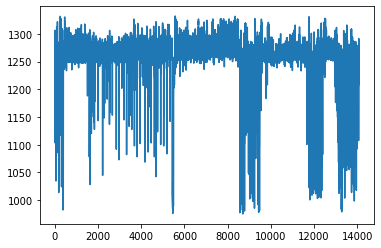

In [7]:
plt.plot(df["Machine1.RawMaterialFeederParameter.U.Actual"])

#### Machine2.RawMaterialFeederParameter.U.Actual

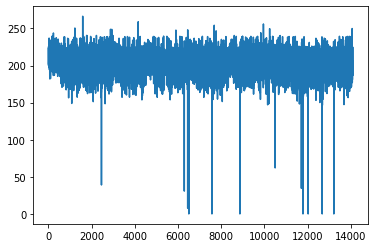

In [8]:
plt.plot(df["Machine2.RawMaterialFeederParameter.U.Actual"])

In [9]:
df = df.loc[df["Machine2.RawMaterialFeederParameter.U.Actual"] > 100]

In [10]:
df.shape

(13678, 116)

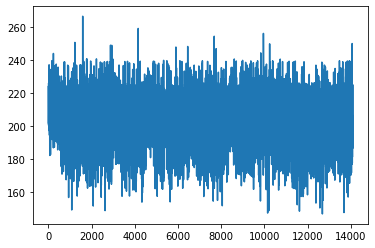

In [11]:
plt.plot(df["Machine2.RawMaterialFeederParameter.U.Actual"])

#### Machine3.RawMaterialFeederParameter.U.Actual

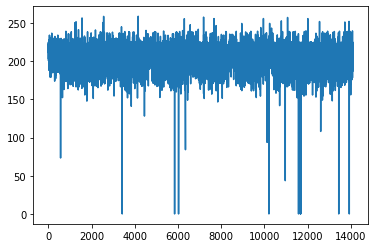

In [12]:
plt.plot(df["Machine3.RawMaterialFeederParameter.U.Actual"])

In [13]:
df = df.loc[df["Machine3.RawMaterialFeederParameter.U.Actual"] > 140]

In [14]:
df.shape

(13662, 116)

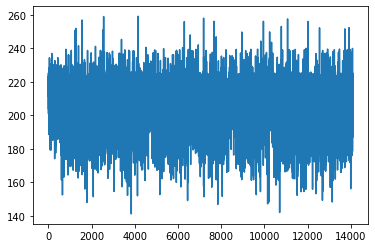

In [15]:
plt.plot(df["Machine3.RawMaterialFeederParameter.U.Actual"])

## Temperature

#### Machine2.Zone1Temperature.C.Actual

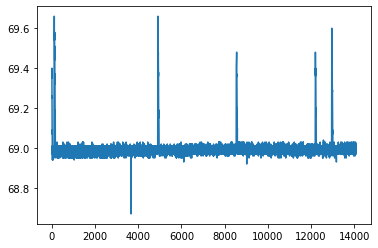

In [16]:
plt.plot(df["Machine2.Zone1Temperature.C.Actual"])

In [17]:
df = df.loc[(df["Machine2.Zone1Temperature.C.Actual"] < 69.05) &
            (df["Machine2.Zone1Temperature.C.Actual"] > 68.9)]

In [18]:
df.shape

(13402, 116)

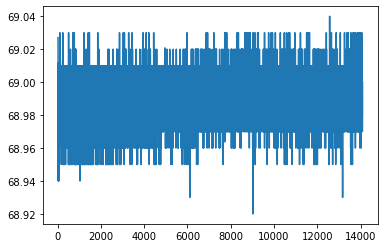

In [19]:
plt.plot(df["Machine2.Zone1Temperature.C.Actual"])

#### Machine2.Zone2Temperature.C.Actual

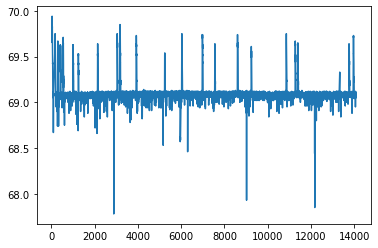

In [20]:
plt.plot(df["Machine2.Zone2Temperature.C.Actual"])

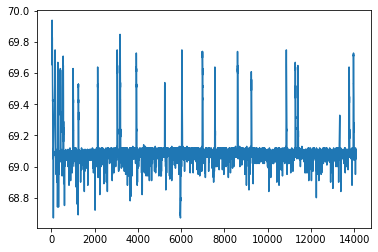

In [21]:
plt.plot(df.loc[df["Machine2.Zone2Temperature.C.Actual"] > 68.66]["Machine2.Zone2Temperature.C.Actual"])

In [22]:
df.loc[df["Machine2.Zone2Temperature.C.Actual"] > 68.66].shape

(13379, 116)

In [23]:
df = df.loc[df["Machine2.Zone2Temperature.C.Actual"] > 68.66]

In [24]:
df.shape

(13379, 116)

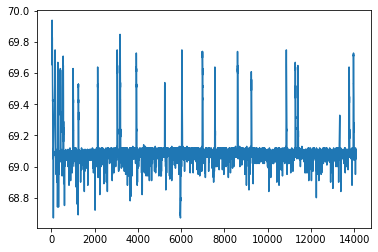

In [25]:
plt.plot(df["Machine2.Zone2Temperature.C.Actual"])

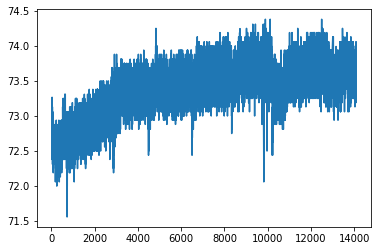

In [26]:
plt.plot(df["Machine2.MotorAmperage.U.Actual"])

### preprocessed Stage1 csv 추출

In [27]:
df.reset_index(drop=True).to_csv("F:\\kdt jupyter\\Project\\Data\\stage1_preprocessed.csv", index = False)

#### Drop Columns

In [167]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine1.MotorAmperage.U.Actual", "Machine2.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual",
             "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual"]

In [168]:
df_X_reduced = df.drop(drop_cols, axis=1)

#### 상관계수 분석

In [174]:
df_X_reduced.iloc[:, 6:28].corr()

,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.MotorRPM.C.Actual,Machine1.MaterialPressure.U.Actual,Machine1.MaterialTemperature.U.Actual,Machine1.ExitZoneTemperature.C.Actual,Machine2.RawMaterial.Property1,Machine2.RawMaterial.Property2,Machine2.RawMaterial.Property3,Machine2.RawMaterial.Property4,Machine2.RawMaterialFeederParameter.U.Actual,...,Machine3.RawMaterial.Property1,Machine3.RawMaterial.Property2,Machine3.RawMaterial.Property3,Machine3.RawMaterial.Property4,Machine3.RawMaterialFeederParameter.U.Actual,Machine3.MotorRPM.C.Actual,Machine3.MaterialPressure.U.Actual,Machine3.MaterialTemperature.U.Actual,FirstStage.CombinerOperation.Temperature1.U.Actual,FirstStage.CombinerOperation.Temperature2.U.Actual
Machine1.RawMaterialFeederParameter.U.Actual,1.000000,-0.197871,0.083000,-0.134141,-0.223434,-0.056014,-0.056014,0.056014,0.056014,-0.011235,...,0.095711,-0.122261,-0.118231,-0.114559,0.006267,0.194939,-0.033368,-0.028150,-0.261195,-0.243450
Machine1.MotorRPM.C.Actual,-0.197871,1.000000,-0.598271,0.627353,0.624505,0.476490,0.476490,-0.476490,-0.476490,-0.045176,...,-0.526698,0.805377,0.708649,0.779150,-0.049975,-0.875880,0.231285,0.457853,0.912591,0.816217
Machine1.MaterialPressure.U.Actual,0.083000,-0.598271,1.000000,0.089837,-0.004767,-0.343725,-0.343725,0.343725,0.343725,0.030288,...,0.284571,-0.491059,-0.407352,-0.483704,0.037502,0.290640,-0.124528,-0.374131,-0.652830,-0.507179
Machine1.MaterialTemperature.U.Actual,-0.134141,0.627353,0.089837,1.000000,0.740092,0.449457,0.449457,-0.449457,-0.449457,-0.075159,...,-0.283417,0.584537,0.447484,0.588846,-0.073674,-0.792375,0.221138,0.516910,0.497202,0.368060
Machine1.ExitZoneTemperature.C.Actual,-0.223434,0.624505,-0.004767,0.740092,1.000000,0.239303,0.239303,-0.239303,-0.239303,-0.047999,...,-0.299593,0.428962,0.390332,0.410491,-0.049229,-0.754851,0.126412,0.197663,0.561079,0.503429
Machine2.RawMaterial.Property1,-0.056014,0.476490,-0.343725,0.449457,0.239303,1.000000,1.000000,-1.000000,-1.000000,-0.031349,...,0.090751,0.635473,0.216759,0.734352,-0.037230,-0.505791,0.641441,0.857171,0.366873,0.233505
Machine2.RawMaterial.Property2,-0.056014,0.476490,-0.343725,0.449457,0.239303,1.000000,1.000000,-1.000000,-1.000000,-0.031349,...,0.090751,0.635473,0.216759,0.734352,-0.037230,-0.505791,0.641441,0.857171,0.366873,0.233505
Machine2.RawMaterial.Property3,0.056014,-0.476490,0.343725,-0.449457,-0.239303,-1.000000,-1.000000,1.000000,1.000000,0.031349,...,-0.090751,-0.635473,-0.216759,-0.734352,0.037230,0.505791,-0.641441,-0.857171,-0.366873,-0.233505
Machine2.RawMaterial.Property4,0.056014,-0.476490,0.343725,-0.449457,-0.239303,-1.000000,-1.000000,1.000000,1.000000,0.031349,...,-0.090751,-0.635473,-0.216759,-0.734352,0.037230,0.505791,-0.641441,-0.857171,-0.366873,-0.233505
Machine2.RawMaterialFeederParameter.U.Actual,-0.011235,-0.045176,0.030288,-0.075159,-0.047999,-0.031349,-0.031349,0.031349,0.031349,1.000000,...,0.030174,-0.046940,-0.040948,-0.045535,0.371620,0.039177,0.019300,-0.075181,-0.032346,0.025585


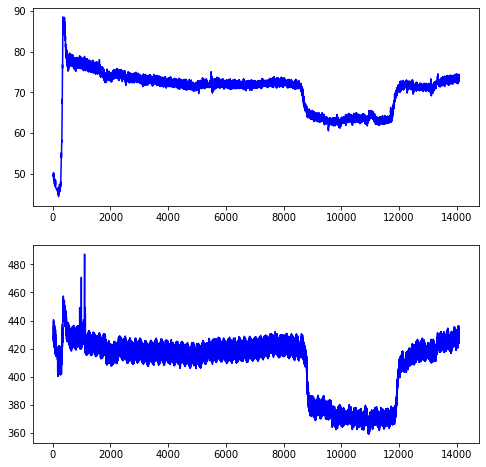

In [158]:
fig, ax = plt.subplots(2, figsize = (8, 8))
ax[0].plot(df_X_reduced["Machine1.MotorAmperage.U.Actual"], "b")
ax[1].plot(df_X_reduced["Machine1.MaterialPressure.U.Actual"], "b")

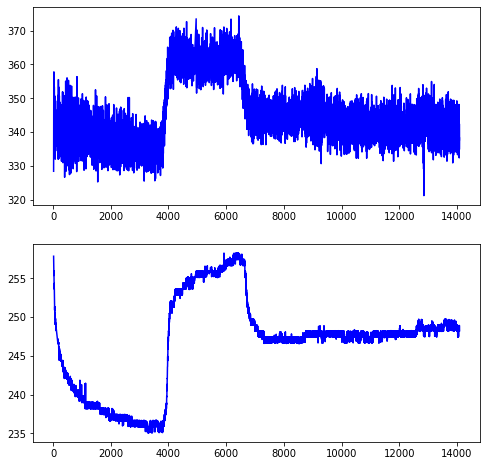

In [165]:
fig, ax = plt.subplots(2, figsize = (8, 8))
ax[0].plot(df_X_reduced["Machine3.MotorAmperage.U.Actual"], "b")
ax[1].plot(df_X_reduced["Machine3.MaterialPressure.U.Actual"], "b")

##### "Machine1.MotorAmperage.U.Actual", "Machine3.MotorAmperage.U.Actual" 삭제하는게 좋을듯

## Stage1 output0

In [28]:
df0 = df.copy()

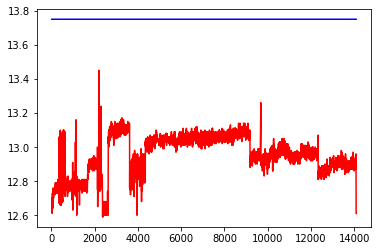

In [29]:
# output 값 12.58 보다 작은 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "b")

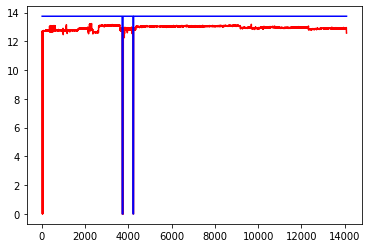

In [30]:
# output 값 13.25 보다 큰 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "b")

In [31]:
# 이상치 제거 데이터 생성
df0_reduced = df0.loc[(df0["Stage1.Output.Measurement0.U.Actual"] > 12.58) & (df0["Stage1.Output.Measurement0.U.Actual"] < 13.25)]

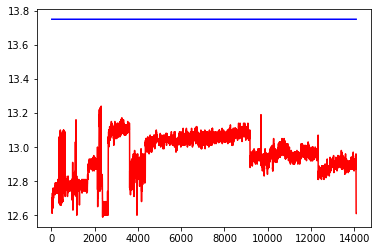

In [32]:
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Setpoint"], "b")

##### reset_index

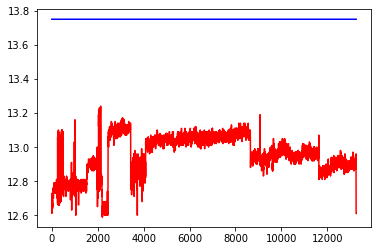

In [33]:
plt.plot(df0_reduced.reset_index(drop = True)["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced.reset_index(drop = True)["Stage1.Output.Measurement0.U.Setpoint"], "b")

##### csv 파일 추출

In [34]:
df0_indexed = df0_reduced.reset_index(drop = True)
df0_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df0_indexed.csv", index = False)

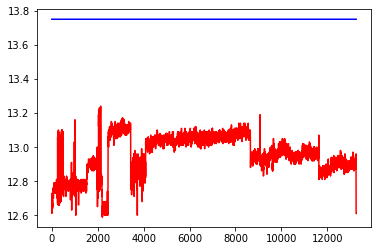

In [35]:
plt.plot(df0_indexed.loc[df0_indexed["Machine1.RawMaterialFeederParameter.U.Actual"] > 975]["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_indexed.loc[df0_indexed["Machine1.RawMaterialFeederParameter.U.Actual"] > 975]["Stage1.Output.Measurement0.U.Setpoint"], "b")

## Stage1 output1

In [36]:
df1 = df.copy()

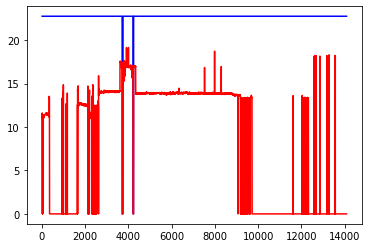

In [37]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

In [38]:
# 인덱스 357 ~ 1649, 9719 이후 이상치들 제거
df1 = pd.concat([df1[:357], df1[1650:9693]])

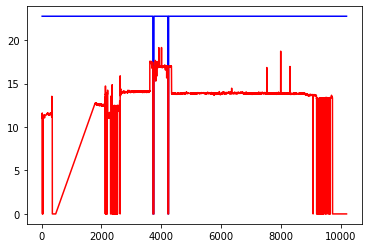

In [39]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

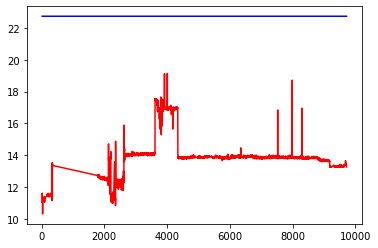

In [40]:
# output 값 0 데이터 제거
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "r")
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "b")

In [41]:
# 이상치 제거 데이터 생성
df1_reduced = df1.loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01]

##### csv 파일 추출

In [42]:
df1_indexed = df1_reduced.reset_index(drop = True)
df1_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df1_indexed.csv", index = False)

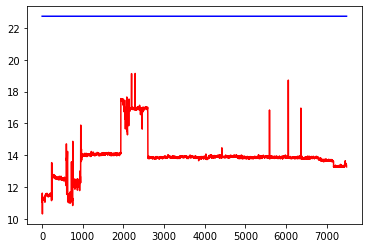

In [43]:
plt.plot(df1_indexed["Stage1.Output.Measurement1.U.Actual"], "r")
plt.plot(df1_indexed["Stage1.Output.Measurement1.U.Setpoint"], "b")

## Stage1 output2

In [44]:
df2 = df.copy()

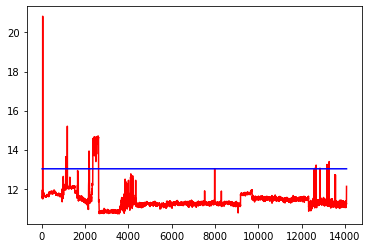

In [45]:
# output 값 10.5 보다 작은 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "b")

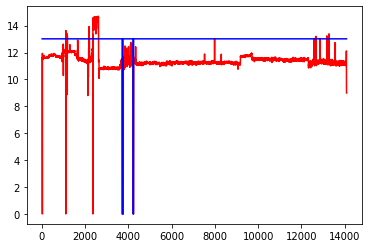

In [46]:
# output 값 15 보다 큰 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "b")

In [47]:
# 이상치 제거 데이터 생성
df2_reduced = df2.loc[(df2["Stage1.Output.Measurement2.U.Actual"] > 10.5) & (df2["Stage1.Output.Measurement2.U.Actual"] < 15)]

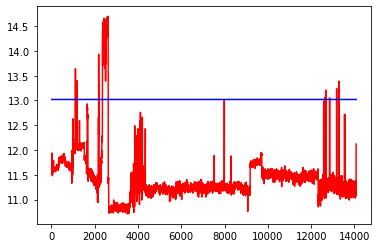

In [48]:
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Setpoint"], "b")

##### csv 파일 추출

In [49]:
df2_indexed = df2_reduced.reset_index(drop = True)
df2_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df2_indexed.csv", index = False)

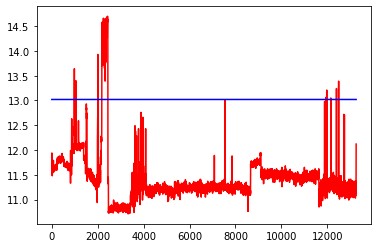

In [50]:
plt.plot(df2_indexed["Stage1.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_indexed["Stage1.Output.Measurement2.U.Setpoint"], "b")

## Stage1 output3

In [51]:
df3 = df.copy()

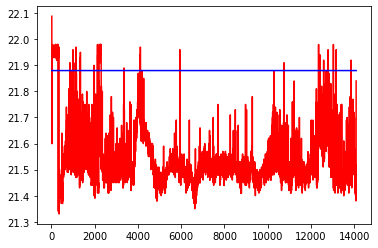

In [52]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df3["Stage1.Output.Measurement3.U.Actual"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "r")
plt.plot(df3["Stage1.Output.Measurement3.U.Setpoint"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "b")

In [53]:
# 이상치 제거 데이터 생성
df3_reduced = df3.loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3]

##### csv 파일 추출

In [54]:
df3_indexed = df3_reduced.reset_index(drop = True)
df3_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df3_indexed.csv", index = False)

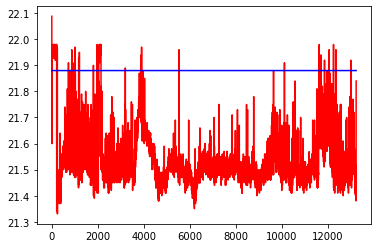

In [55]:
plt.plot(df3_indexed["Stage1.Output.Measurement3.U.Actual"], "r")
plt.plot(df3_indexed["Stage1.Output.Measurement3.U.Setpoint"], "b")

## Stage1 output4

In [56]:
df4 = df.copy()

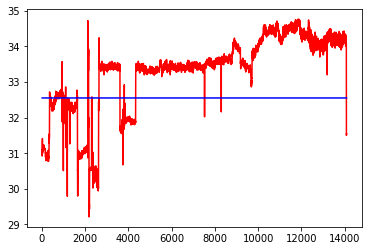

In [57]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df4["Stage1.Output.Measurement4.U.Actual"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "r")
plt.plot(df4["Stage1.Output.Measurement4.U.Setpoint"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "b")

In [58]:
# 이상치 제거 데이터 생성
df4_reduced = df4.loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5]

##### csv 파일 추출

In [59]:
df4_indexed = df4_reduced.reset_index(drop = True)
df4_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df4_indexed.csv", index = False)

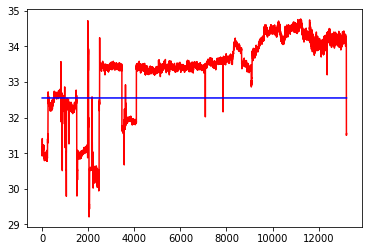

In [60]:
plt.plot(df4_indexed["Stage1.Output.Measurement4.U.Actual"], "r")
plt.plot(df4_indexed["Stage1.Output.Measurement4.U.Setpoint"], "b")

## Stage1 output5

In [61]:
df5 = df.copy()

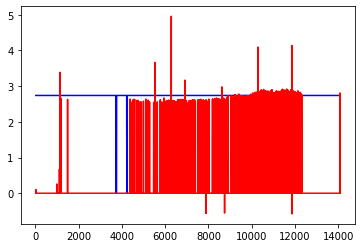

In [62]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

In [63]:
# 인덱스 4377 이전, 12310 이후 이상치들 제거
df5 = df5[4378:12284]

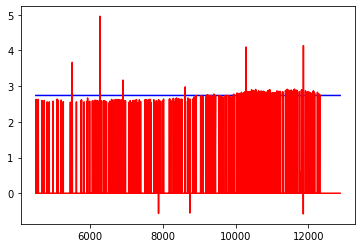

In [64]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

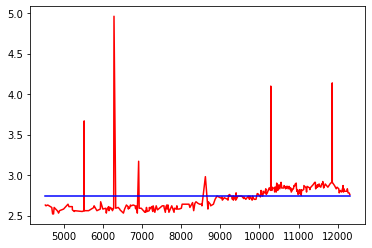

In [65]:
# output 값 2 보다 작은 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "b")

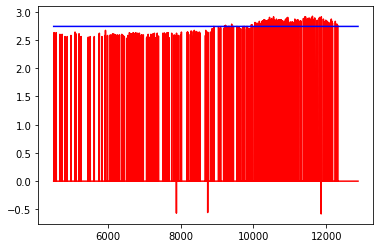

In [66]:
# output 값 2.97 보다 큰 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "b")

In [67]:
# 이상치 제거 데이터 생성
df5_reduced = df5.loc[(df5["Stage1.Output.Measurement5.U.Actual"] > 2) & (df5["Stage1.Output.Measurement5.U.Actual"] < 2.97)]

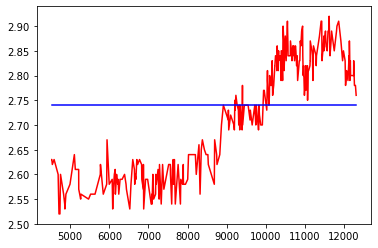

In [68]:
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Setpoint"], "b")

##### csv 파일 추출

In [69]:
df5_indexed = df5_reduced.reset_index(drop = True)
df5_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df5_indexed.csv", index = False)

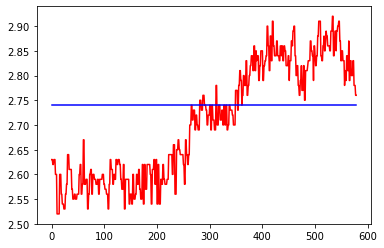

In [70]:
plt.plot(df5_indexed["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_indexed["Stage1.Output.Measurement5.U.Setpoint"], "b")

## Stage1 output6

In [71]:
df6 = df.copy()

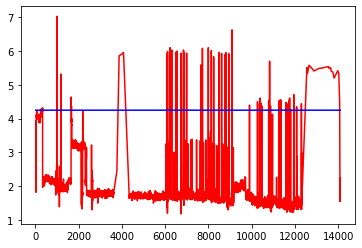

In [72]:
# output 값 1 보다 작은 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "b")

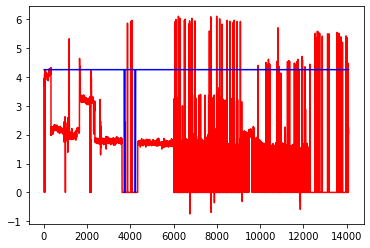

In [73]:
# output 값 6.5 보다 큰 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "b")

In [74]:
# 이상치 제거 데이터 생성
df6_reduced = df6.loc[(df6["Stage1.Output.Measurement6.U.Actual"] > 1) & (df6["Stage1.Output.Measurement6.U.Actual"] < 6.5)]

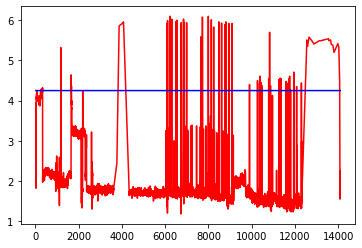

In [75]:
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")

##### csv 파일 추출

In [76]:
df6_indexed = df6_reduced.reset_index(drop = True)
df6_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df6_indexed.csv", index = False)

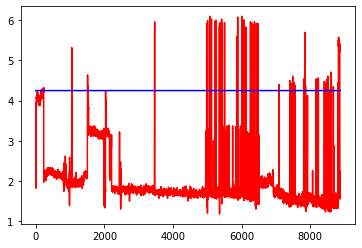

In [77]:
plt.plot(df6_indexed["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_indexed["Stage1.Output.Measurement6.U.Setpoint"], "b")

## Stage1 output7

In [78]:
df7 = df.copy()

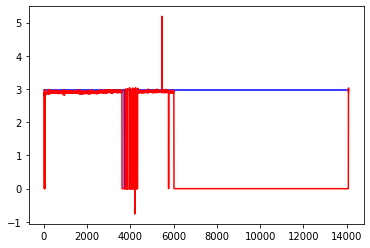

In [79]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

In [80]:
# 인덱스 6015 이후 이상치들 제거
df7 = df7[:6015]

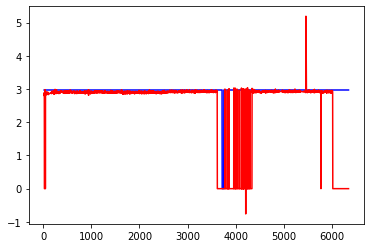

In [81]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

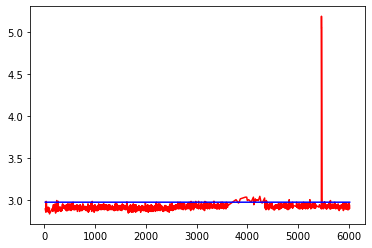

In [82]:
# output 값 2.82 보다 작은 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "b")

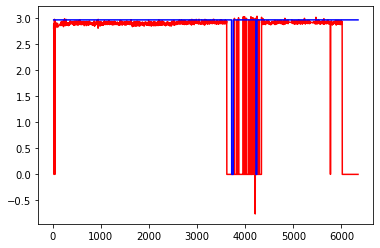

In [83]:
# output 값 3.05 보다 큰 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "b")

In [84]:
# 이상치 제거 데이터 생성
df7_reduced = df7.loc[(df7["Stage1.Output.Measurement7.U.Actual"] > 2.82) & (df7["Stage1.Output.Measurement7.U.Actual"] < 3.05)]

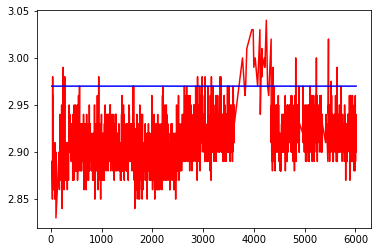

In [85]:
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Setpoint"], "b")

##### csv 파일 추출

In [86]:
df7_indexed = df7_reduced.reset_index(drop = True)
df7_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df7_indexed.csv", index = False)

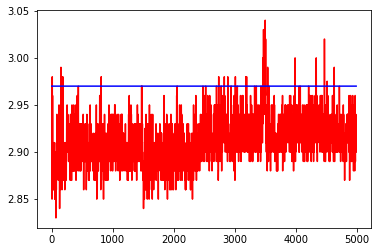

In [87]:
plt.plot(df7_indexed["Stage1.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_indexed["Stage1.Output.Measurement7.U.Setpoint"], "b")

## Stage1 output8

In [88]:
df8 = df.copy()

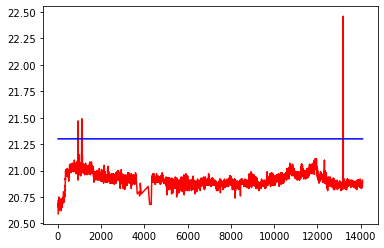

In [89]:
# output 값 20.57 보다 작은 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "b")

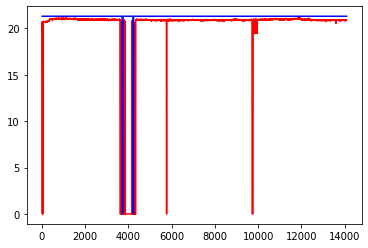

In [90]:
# output 값 21.4 보다 큰 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.2], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.4], "b")

In [91]:
# 이상치 제거 데이터 생성
df8_reduced = df8.loc[(df8["Stage1.Output.Measurement8.U.Actual"] > 20.57) & (df8["Stage1.Output.Measurement8.U.Actual"] < 21.2)]

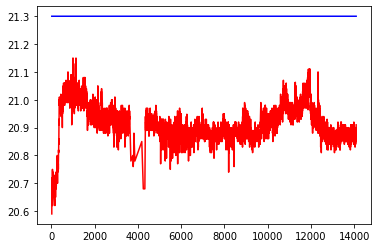

In [92]:
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Setpoint"], "b")

##### csv 파일 추출

In [93]:
df8_indexed = df8_reduced.reset_index(drop = True)
df8_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df8_indexed.csv", index = False)

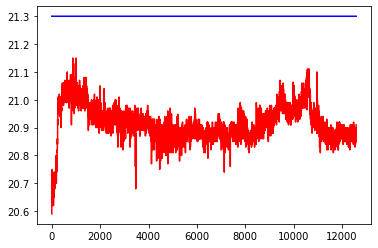

In [94]:
plt.plot(df8_indexed["Stage1.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_indexed["Stage1.Output.Measurement8.U.Setpoint"], "b")

## Stage1 output9

In [95]:
df9 = df.copy()

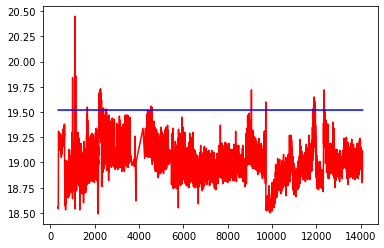

In [96]:
# output 값 18.45 보다 작은 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "b")

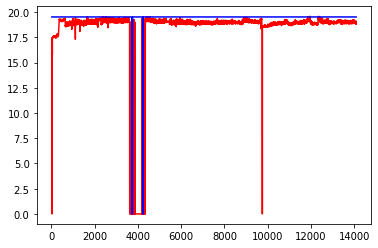

In [97]:
# output 값 19.6 보다 큰 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "b")

In [98]:
# 이상치 제거 데이터 생성
df9_reduced = df9.loc[(df9["Stage1.Output.Measurement9.U.Actual"] > 18.45) & (df9["Stage1.Output.Measurement9.U.Actual"] < 19.6)]

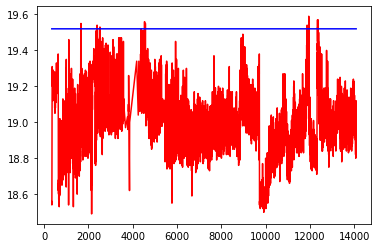

In [99]:
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Setpoint"], "b")

##### csv 파일 추출

In [100]:
df9_indexed = df9_reduced.reset_index(drop = True)
df9_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df9_indexed.csv", index = False)

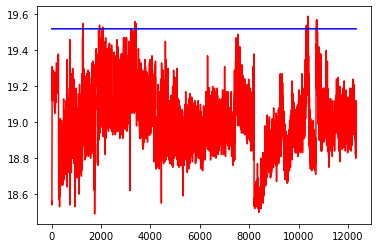

In [101]:
plt.plot(df9_indexed["Stage1.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_indexed["Stage1.Output.Measurement9.U.Setpoint"], "b")

## Stage1 output10

In [102]:
df10 = df.copy()

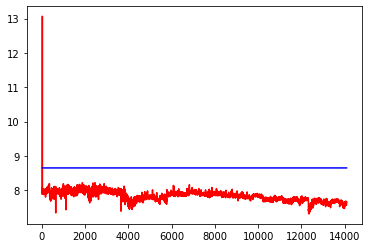

In [103]:
# output 값 7.3 보다 작은 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 7.3], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 7.3], "b")

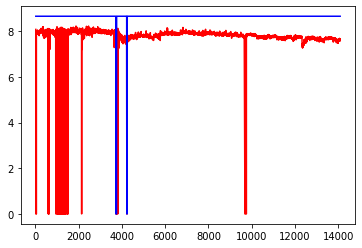

In [104]:
# output 값 10보다 큰 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "b")

In [105]:
# 이상치 제거 데이터 생성
df10_reduced = df10.loc[(df10["Stage1.Output.Measurement10.U.Actual"] > 7.3) & (df10["Stage1.Output.Measurement10.U.Actual"] < 10)]

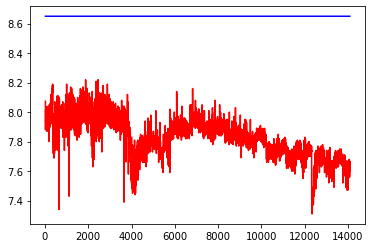

In [106]:
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Setpoint"], "b")

##### csv 파일 추출

In [107]:
df10_indexed = df10_reduced.reset_index(drop = True)
df10_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df10_indexed.csv", index = False)

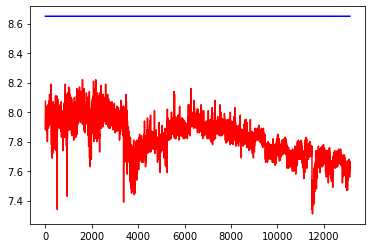

In [108]:
plt.plot(df10_indexed["Stage1.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_indexed["Stage1.Output.Measurement10.U.Setpoint"], "b")

## Stage1 output11

In [109]:
df11 = df.copy()

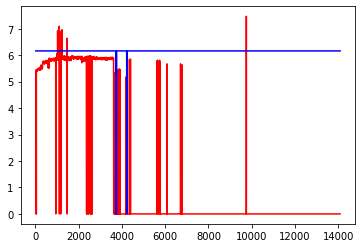

In [110]:
# 첫 번째 Setpoint 이후로는 거의 0값
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

In [111]:
# 첫 번째 Setpoint 이후 데이터 삭제
df11["Stage1.Output.Measurement11.U.Actual"][3614:3618]
df11 = df11[:3616]

3754    0.000000
3755    1.089326
3756    5.300000
3757    5.300000
Name: Stage1.Output.Measurement11.U.Actual, dtype: float64

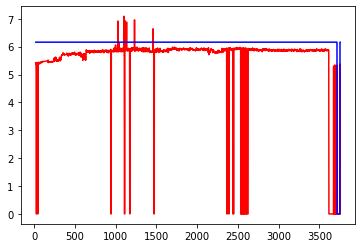

In [112]:
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

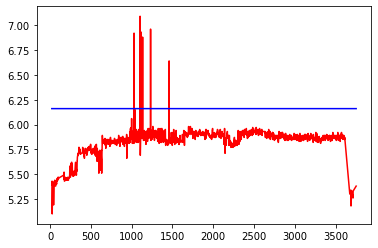

In [113]:
# output 값 4 보다 작은 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "b")

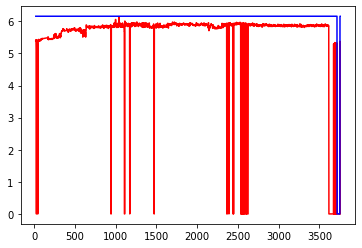

In [114]:
# output 값 6.5보다 큰 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "b")

In [115]:
# 이상치 제거 데이터 생성
df11_reduced = df11.loc[(df11["Stage1.Output.Measurement11.U.Actual"] > 4) & (df11["Stage1.Output.Measurement11.U.Actual"] < 6.5)]

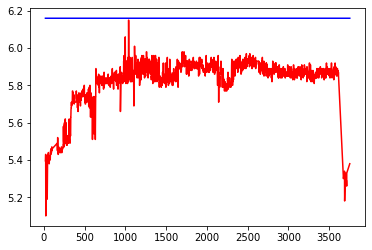

In [116]:
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Setpoint"], "b")

##### csv 파일 추출

In [117]:
df11_indexed = df11_reduced.reset_index(drop = True)
df11_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df11_indexed.csv", index = False)

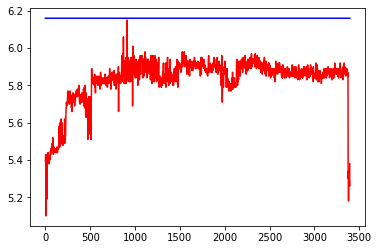

In [118]:
plt.plot(df11_indexed["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_indexed["Stage1.Output.Measurement11.U.Setpoint"], "b")

## Stage1 output12

In [119]:
df12 = df.copy()

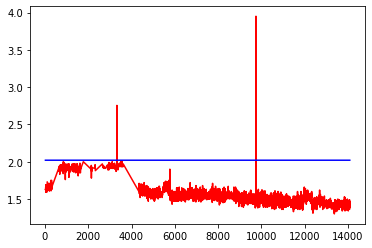

In [120]:
# output 값 1.15보다 작은 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "b")

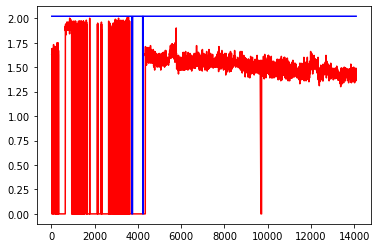

In [121]:
# output 값 2.5보다 큰 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "b")

In [122]:
# 이상치 제거 데이터 생성
df12_reduced = df12.loc[(df12["Stage1.Output.Measurement12.U.Actual"] > 1.15) & (df12["Stage1.Output.Measurement12.U.Actual"] < 2.5)]

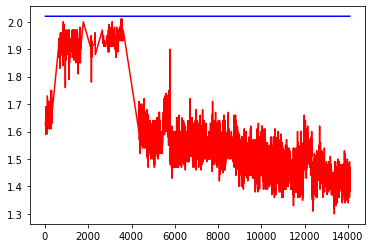

In [123]:
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Setpoint"], "b")

##### csv 파일 추출

In [124]:
df12_indexed = df12_reduced.reset_index(drop = True)
df12_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df12_indexed.csv", index = False)

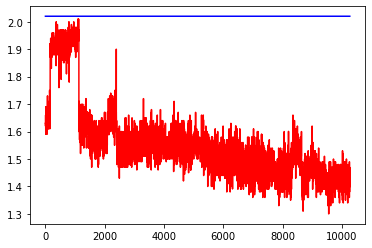

In [125]:
plt.plot(df12_indexed["Stage1.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_indexed["Stage1.Output.Measurement12.U.Setpoint"], "b")

## Stage1 output13

In [126]:
df13 = df.copy()

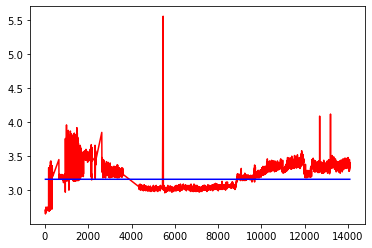

In [127]:
# output 값 2보다 작은 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "b")

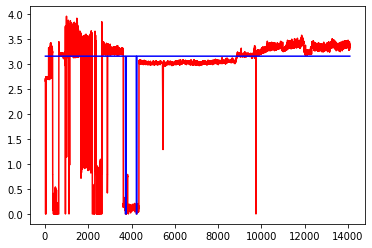

In [128]:
# output 값 4보다 큰 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "b")

In [129]:
# 이상치 제거 데이터 생성
df13_reduced = df13.loc[(df13["Stage1.Output.Measurement13.U.Actual"] > 2) & (df13["Stage1.Output.Measurement13.U.Actual"] < 4)]

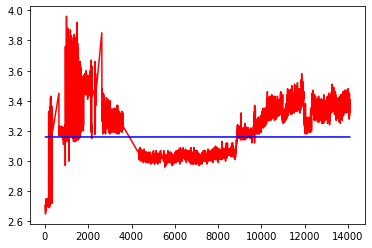

In [130]:
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Setpoint"], "b")

##### csv 파일 추출

In [131]:
df13_indexed = df13_reduced.reset_index(drop = True)
df13_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df13_indexed.csv", index = False)

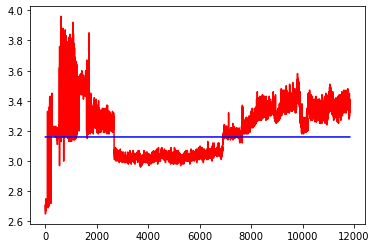

In [132]:
plt.plot(df13_indexed["Stage1.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_indexed["Stage1.Output.Measurement13.U.Setpoint"], "b")

## Stage1 output14

In [133]:
df14 = df.copy()

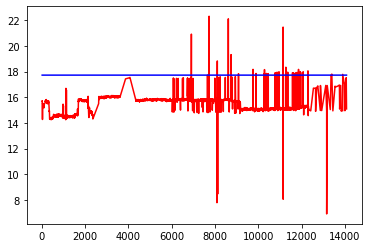

In [134]:
# output 값 1보다 작은 데이터 제거
plt.plot(df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "r")
plt.plot(df14["Stage1.Output.Measurement14.U.Setpoint"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "b")

##### 20보다 큰이상치 인덱스 검색

In [135]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 20]

6911     20.910000
6912     20.910000
7730     22.301788
8617     22.100000
8618     22.100000
11148    21.457282
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [136]:
df14["Stage1.Output.Measurement14.U.Actual"][6908:6915]

7240    15.79
7241    15.82
7242    15.82
7243    15.82
7244    15.76
7245    15.76
7246     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [137]:
df14["Stage1.Output.Measurement14.U.Actual"][7727:7733]

8060    15.76
8061    15.76
8062     0.00
8063     0.00
8064     0.00
8065     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [138]:
df14["Stage1.Output.Measurement14.U.Actual"][8614:8621]

9026     0.0
9027    15.7
9028    15.7
9029     0.0
9030     0.0
9031     0.0
9032     0.0
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [139]:
df14["Stage1.Output.Measurement14.U.Actual"][11145:11151]

11646    15.12
11647    15.20
11648    15.20
11649    15.06
11650     0.00
11651     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 20보다 큰 인덱스들도 삭제

##### 10보다 작은 이상치 인덱스 검색

In [140]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[(df14["Stage1.Output.Measurement14.U.Actual"] < 10) & (df14["Stage1.Output.Measurement14.U.Actual"] > 6)]

8093     7.794189
8127     8.470173
11152    8.062649
13161    6.919961
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [141]:
df14["Stage1.Output.Measurement14.U.Actual"][8090:8097]

8423     0.00
8424     0.00
8425     0.00
8426     0.00
8427     0.00
8428     0.00
8429    15.76
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [142]:
df14["Stage1.Output.Measurement14.U.Actual"][8124:8131]

8457     0.00
8458     0.00
8459     0.00
8460    15.82
8461    15.82
8462     0.00
8463     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [143]:
df14["Stage1.Output.Measurement14.U.Actual"][11149:11156]

11650     0.00
11651     0.00
11652     0.00
11653    15.05
11654    15.13
11656     0.00
11657     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [144]:
df14["Stage1.Output.Measurement14.U.Actual"][13158:13165]

13866    0.0
13867    0.0
13868    0.0
13869    0.0
13870    0.0
13871    0.0
13872    0.0
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 이상치인 0으로 오거나 가는 과정에서 나타난 것으로 보임

##### 제거 가능할 듯

In [145]:
# 이상치 제거 데이터 생성
df14_reduced = df14.loc[(df14["Stage1.Output.Measurement14.U.Actual"] > 10) & (df14["Stage1.Output.Measurement14.U.Actual"] < 20)]

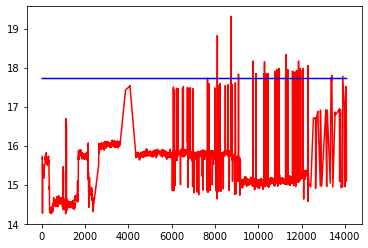

In [146]:
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Setpoint"], "b")

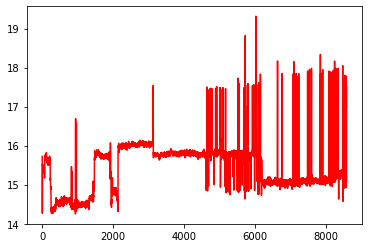

In [147]:
plt.plot(df14_reduced.reset_index(drop = True)["Stage1.Output.Measurement14.U.Actual"], "r")

##### csv 파일 추출

In [148]:
df14_indexed = df14_reduced.reset_index(drop = True)
df14_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df14_indexed.csv", index = False)

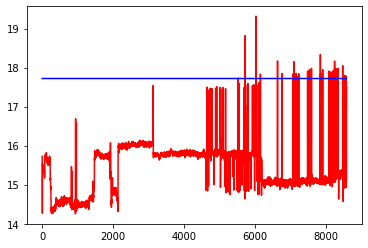

In [149]:
plt.plot(df14_indexed["Stage1.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_indexed["Stage1.Output.Measurement14.U.Setpoint"], "b")

## 전처리 후 각 stage1 output plot

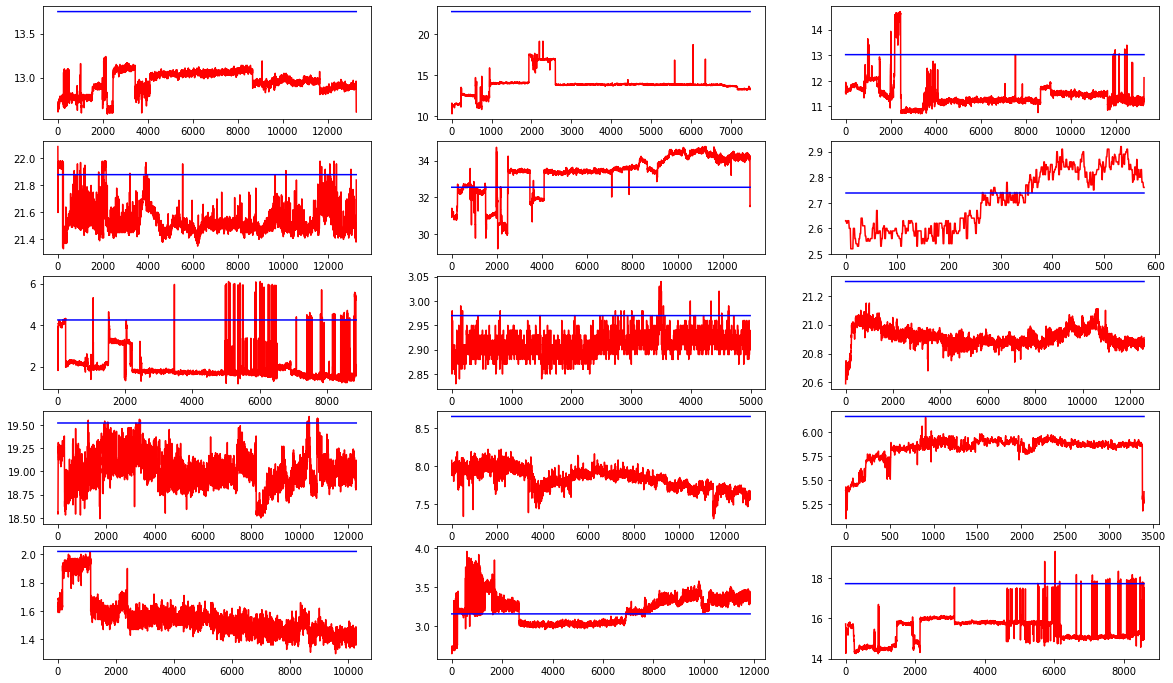

In [150]:
fig, ax = plt.subplots(5, 3, figsize = (20, 12))

ax[0, 0].plot(df0_indexed["Stage1.Output.Measurement0.U.Actual"], "r")
ax[0, 0].plot(df0_indexed["Stage1.Output.Measurement0.U.Setpoint"], "b")
ax[0, 1].plot(df1_indexed["Stage1.Output.Measurement1.U.Actual"], "r")
ax[0, 1].plot(df1_indexed["Stage1.Output.Measurement1.U.Setpoint"], "b")
ax[0, 2].plot(df2_indexed["Stage1.Output.Measurement2.U.Actual"], "r")
ax[0, 2].plot(df2_indexed["Stage1.Output.Measurement2.U.Setpoint"], "b")

ax[1, 0].plot(df3_indexed["Stage1.Output.Measurement3.U.Actual"], "r")
ax[1, 0].plot(df3_indexed["Stage1.Output.Measurement3.U.Setpoint"], "b")
ax[1, 1].plot(df4_indexed["Stage1.Output.Measurement4.U.Actual"], "r")
ax[1, 1].plot(df4_indexed["Stage1.Output.Measurement4.U.Setpoint"], "b")
ax[1, 2].plot(df5_indexed["Stage1.Output.Measurement5.U.Actual"], "r")
ax[1, 2].plot(df5_indexed["Stage1.Output.Measurement5.U.Setpoint"], "b")

ax[2, 0].plot(df6_indexed["Stage1.Output.Measurement6.U.Actual"], "r")
ax[2, 0].plot(df6_indexed["Stage1.Output.Measurement6.U.Setpoint"], "b")
ax[2, 1].plot(df7_indexed["Stage1.Output.Measurement7.U.Actual"], "r")
ax[2, 1].plot(df7_indexed["Stage1.Output.Measurement7.U.Setpoint"], "b")
ax[2, 2].plot(df8_indexed["Stage1.Output.Measurement8.U.Actual"], "r")
ax[2, 2].plot(df8_indexed["Stage1.Output.Measurement8.U.Setpoint"], "b")

ax[3, 0].plot(df9_indexed["Stage1.Output.Measurement9.U.Actual"], "r")
ax[3, 0].plot(df9_indexed["Stage1.Output.Measurement9.U.Setpoint"], "b")
ax[3, 1].plot(df10_indexed["Stage1.Output.Measurement10.U.Actual"], "r")
ax[3, 1].plot(df10_indexed["Stage1.Output.Measurement10.U.Setpoint"], "b")
ax[3, 2].plot(df11_indexed["Stage1.Output.Measurement11.U.Actual"], "r")
ax[3, 2].plot(df11_indexed["Stage1.Output.Measurement11.U.Setpoint"], "b")

ax[4, 0].plot(df12_indexed["Stage1.Output.Measurement12.U.Actual"], "r")
ax[4, 0].plot(df12_indexed["Stage1.Output.Measurement12.U.Setpoint"], "b")
ax[4, 1].plot(df13_indexed["Stage1.Output.Measurement13.U.Actual"], "r")
ax[4, 1].plot(df13_indexed["Stage1.Output.Measurement13.U.Setpoint"], "b")
ax[4, 2].plot(df14_indexed["Stage1.Output.Measurement14.U.Actual"], "r")
ax[4, 2].plot(df14_indexed["Stage1.Output.Measurement14.U.Setpoint"], "b")

plt.show()